# Practical x: Pandas data discovery - Raster vs. Vector Data 

<div class="alert alert-block alert-success">
<b>Objectives:</b> In this practical we will use the GeoPandas package to load data from files and visualise our results on a map. We will introduce the concepts of both raster and vector data, and how these underline the approach of <b>Geographic Information Systems, or GIS</b>. To do this we will open and manipulate datafiles that contains information on emissions and model estimates across the UK. We will do this through the following activities [starting with social data!]:
    
 - 1) [Introduction: Raster vs. Vector Data in Environmental Science](#Part1)
      * [Exercise 1: Create a map showing social deprivation indices](#Exercise1)
 - 2) [Adding vector point data and combining GeoPandas dataframes](#Part2)
      * [Exercise 2: Plot the distribution of social deprivation indices associated with monitoring sites across the UK](#Exercise4)
      * [Exercise 3: Create a map of social deprivation in Greater Manchester](#Exercise5)
 - 3) [Importing emissions maps from the National Emissions Inventory](#Part3)
      * [Exercise 5: Create a map of PM2.5 emissions across Greater Manchester](#Exercise6)
 - 4) [Calculating distances between points and polygons](#Part3)
      * [Exercise 5: Create a map of social deprivation indices within 3 km of AURN sites](#Exercise6)
 - 5) [Importing model estimates from NetCDF files](#Part4)
      * [Exercise 6: Create a map of estimate PM2.5 concetrations across Greater Manchester](#Exercise6)

As with our other notebooks, we will provide you with a template for plotting the results. Also please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.

Please do not worry about trying to remember all of the syntax in the code we provide. As noted in the lectures, this course is aimed at building experience in using Python and many of its features. Even seasoned professionals have to look up solutions from old files or online! 
</div>


<div class="alert alert-block alert-danger">
<b> Using Google Colabs </b> Please note that the first code block ensures that we can access our files IF we are running this example on Google Colab. Please run this code block and, if you are not on Google Colab, you will recieve a message that confirms this. 
</div>

# 1) Introduction: Raster vs. Vector Data in Environmental Science  <a name="Part1">

In most areas of environmental science spatial data is pivotal for analysis and visualization; So much so that it is useful we briefly extend our geospatial learning to include more *formal* definitions of processes and data types. 

If you start to work more frequently with geospatial data, you will inevitably come across **Geographic Information Systems**, or more commonly referred to as **GIS**. GIS is a system used for capturing, storing, checking, and displaying data related to positions on Earth's surface. It helps analysts understand patterns, relationships, and geographic context. In our course so far we have structured our learning around types of data storage and ways to create and access data. When we refer to GIS we might consider this a seperate field by itself. Indeed, there are multiple components of GIS:

- **Data**: The core of GIS, encompassing geographical (spatial) data and attribute (descriptive) data.
- **Tools for Analysis**: GIS provides tools to analyze and interpret data, revealing patterns and relationships.
- **Visualization**: Beyond maps, GIS allows for sophisticated visual representations like 3D models and thematic maps.

How is this different from what we have looked at so far? GIS essentially is a system for:

- **Layering Information**: GIS layers different types of data (like roads, rivers, population) to show relationships and patterns.
- **Spatial Analysis**: It can perform complex spatial analyses, answering questions like "What is the shortest route?" or "What areas are at high risk for flooding?"

GIS is often, and incorrectly, thought to remain a tool solely within the field of Geography. GIS is not just for geographers; it's used in history, archaeology, environmental science, engineering, and more. Many use dedicated GIS software products to perform the above. The most common include: 

- **ArcGIS**: Developed by Esri, ArcGIS is one of the most widely used GIS software tools globally. It offers a suite of professional GIS applications, including ArcMap, ArcGIS Pro, and various online tools. It's known for its extensive capabilities in data visualization, analysis, and management.
- **QGIS (Quantum GIS)**: An open-source alternative to ArcGIS, QGIS is highly popular among users who prefer open-source. It offers a  set of features for mapping and spatial analysis. Its compatibility with various file formats and extensible nature through plugins makes it a versatile choice.
- **Google Earth Engine**: An advanced cloud-based tool for planetary-scale environmental data analysis. It's known for its massive archive of satellite imagery and geospatial datasets, which are useful for large-scale environmental monitoring and analysis.
- **....**

Tools vary widely in functionality, complexity, and cost, catering to different needs and skill levels. In this notebook we will find that there are modules, thus tools, in Python that can perform the aforementioned GIS functionality of layering through to spatial analysis. However we need to add new formal defintions to the core of GIS, the underlying data, before we begin. 

## Raster and Vector Data

Geospatial data primarily comes in two forms: **raster** and **vector** data. Understanding their differences, applications, and formats is important in the field. 

![](https://github.com/loftytopping/DEES_programming_course/blob/master/images/featured3.png?raw=true) 


### Raster Data

Raster data represents the Earth's surface as a matrix of cells, with each cell holding a value to represent a certain attribute like temperature or elevation. You can think of this as a checkerboard placed over the ground, where there is a value in each cell of the board. This may represent any variable of interest such as temperature, soil moisture, height and so on. The left hand side of figure 1 illustrates this concept. We can imagine opening a raster dataset in a wide range of software products, including Excel if we really wanted to.

### Vector Data

Vector data uses geometric shapes (points, lines, polygons) to represent spatial features like locations (wells, weather stations), paths (rivers, roads), and areas (lakes, political boundaries). We have already encoutered points in the previous notebook. Coordinates of single locations as a function of time resemble a raster dataset. 

Key characteristics and examples of both **raster** and **vector** data are given in the table below. You can also find common formats used for storing the data. That isnt to say we will stop using CSV files. However, we quickly find that CSV files are rather limited when we start to work with data that is more complex than tabular structures. CSV files are also relatively inefficient so larger quantities of data require bespoke formats. We have already noted that Pandas can work with a wide range of data formats. For example, JSON stands for JavaScript Object Notation. It is a lightweight data-interchange format that is easy for humans to read and write, and easy for machines to parse and generate. 


If you were to open a GEOJSON file in a text editor you might find something similar to the following example containing a single point feature:

```json
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "Point",
        "coordinates": [-73.9617, 40.6629]
      },
      "properties": {
        "name": "Brooklyn",
        "borough": "Kings",
        "state": "NY"
      }
    }
  ]
}
```

In this example, the GeoJSON object is a FeatureCollection. It contains an array of Feature objects. Each Feature has a geometry (in this case, a Point with coordinates) and properties (additional data about the feature). GeoJSON introduces specific types such as Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon, and GeometryCollection. Each of these types is used to represent different types of geographical features. We will be working with SHP files [see table below - Shapefiles] in this notebook. I cant actually provide you with an example of a SHP file per the GeoJOSN file. Shapefiles consist of several files that work together, and they contain binary data which is not human-readable in the same way.  They are however much more efficient in terms of storage requirements. The Shapefile format, commonly known as .shp, was created by Esri (Environmental Systems Research Institute), a leading company in the field of geographic information systems (GIS). Esri developed the Shapefile format in the early 1990s for their GIS software, and it quickly became a popular format for storing geographical data due to its simplicity and ease of use. 


| Data Type | Key Characteristics                                                                 | Common Formats                                  | Examples                                             |
|-----------|-------------------------------------------------------------------------------------|-------------------------------------------------|-----------------------------------------------------|
| Raster    | - Grid format (rows and columns) <br> - Cell values for attributes <br> - Resolution dependent | - GeoTIFF (.tif) <br> - ERDAS IMAGINE (.img) <br> - Digital Elevation Models (DEM) | - Satellite imagery <br> - Elevation data (DEMs) <br> - Land cover maps |
| Vector    | - Shape-based (points, lines, polygons) <br> - Precise location <br> - Attribute richness | - Shapefile (.shp) <br> - GeoJSON (.geojson) / TopoJSON (.topojson) <br> - KML/KMZ (.kml/.kmz) | - Map of geological sample locations <br> - River network diagrams <br> - Boundary maps for geological formations |

You may well ask what category our coordinate data from the previous notebook would fall within. That would be classed as *point vector* data since it was not provided under a fixed grid, but rather a set of latitude and longitude values for each eruption. In this notebook we will also work with polygon and line vector data. Choosing between raster and vector data depends on the data's nature and the analysis requirements. 

- **Analysis type**: Some analyses favor the continuous nature of raster data; others need the precision of vector data.
- **Data integration**: Often, integrating both raster and vector data is necessary.
- **Visualization**: Raster and vector formats differ significantly in mapping and visualization.

Understanding raster and vector data's differences, along with their specific formats, is essential for geoscientists to effectively analyze, integrate, and visualize spatial information.

One more point of discussion before we begin..

A slight *tweak* to Pandas is required to deal with line and polygon vector data. The good news is that someone has already done this for us. A module called GeoPandas is built exactly to deal with line and polygon data. 

## What is GeoPandas?

GeoPandas is an open-source project that makes working with geospatial data in Python easier. It extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by `shapely`. GeoPandas further depends on `fiona` for file access and `matplotlib` for plotting. These are all modules that are installed when we install GeoPandas using the `conda` package manager. Figure xx below provides a simple illustration of GeoPandas. Features of GeoPandas include:

- **Geospatial Data Handling**: Simplifies handling of geospatial data (like shapefiles, GeoJSON) in Python.
- **Integration with pandas**: Builds upon and extends pandas, making it easy to work with geospatial data using familiar pandas functionalities.
- **Geometry Operations**: Enables geometry operations (like calculating area, distance, buffering) directly on GeoDataFrame.
- **Plotting and Visualization**: Offers straightforward plotting of geospatial data, which integrates well with `matplotlib`.

The GeoDataFrame is the core data structure in GeoPandas, which can store geometry columns and perform spatial operations.

![](https://github.com/loftytopping/DEES_programming_course/blob/master/images/geopandas.png?raw=true) 

notice how we still retain the concept of an index, but have a seperate column that can store shapes. We will load a `.shp` file that contains information on bedrock geology across the UK. First we will import relevant modules that we will use across this notebook. These are:

 - GeoPandas
 - Contextily [a small Python 3 (3.7 and above) package to retrieve tile maps from the internet](https://contextily.readthedocs.io/en/latest/). It can add those tiles as a basemap to matplotlib figures, which gives us the underlying map.
 - Matplotlib. As usual...this deals with all of our plotting requirements.

In [6]:
# import the modules, using standard naming convention.
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
%matplotlib inline
import os
from os import path

path=os.getcwd()

# Our file has the following path and name - notice the extension .shp
file = path+"\data\Lower_Super_Output_Area_IMD2019\Lower_Super_Output_Area_(LSOA)_IMD2019_(WGS84).shp"
# Like Pandas, GeoPandas has a read_file function. Im creating a GeoDataframe called 'gdf'
IMD = gpd.read_file(file)

# Preview the GeoDataframe to the screen
IMD

,FID,lsoa11cd,lsoa11nm,IMDRank,IMDDecil,Shape__Are,Shape__Len,geometry
0,1,E01000001,City of London 001A,29199,9,3.438942e+05,3682.367055,"POLYGON ((-10830.126 6714078.454, -10744.067 6..."
1,2,E01000002,City of London 001B,30379,10,5.834531e+05,3910.314357,"POLYGON ((-9810.492 6713690.893, -9939.862 671..."
2,3,E01000003,City of London 001C,14915,5,1.478340e+05,1834.896718,"POLYGON ((-10774.139 6714377.672, -10739.050 6..."
3,4,E01000005,City of London 001E,8678,3,4.919012e+05,3483.118352,"POLYGON ((-8152.031 6712007.933, -8408.171 671..."
4,5,E01000006,Barking and Dagenham 016A,14486,5,3.722545e+05,3108.596473,"POLYGON ((10147.003 6717211.407, 10381.377 671..."
...,...,...,...,...,...,...,...,...
34748,34749,W01001949,Cardiff 005F,0,0,3.336864e+05,2623.760929,"POLYGON ((-356139.910 6714082.578, -356408.524..."
34749,34750,W01001950,Cardiff 049D,0,0,1.918406e+05,2593.900418,"POLYGON ((-352983.659 6704455.923, -352901.010..."
34750,34751,W01001951,Cardiff 049E,0,0,9.845131e+05,4901.333672,"POLYGON ((-351937.498 6706082.260, -351738.158..."
34751,34752,W01001952,Cardiff 049F,0,0,1.443879e+06,6567.587146,"POLYGON ((-353272.688 6705339.609, -353231.031..."


Notice how GeoPandas, like Pandas, has created its own indexing system of assigning a number to each row. There are also mulitple columns. Unfortunately you will often find it is difficult to obtain 'meta data' associated with records. Meta-data provides us with important information, such as when data was collected and so on. 

The original data has been downloaded from the following URL: https://communitiesopendata-communities.hub.arcgis.com/datasets/d473e9ad137240b6aa47c9e3f4bdd674_0/explore

For information, the English Indices of Deprivation 2019 use 39 separate indicators, organised across seven distinct domains of deprivation which can be combined, using appropriate weights, to calculate the Index of Multiple Deprivation 2019 (IMD 2019). This is an overall measure of multiple deprivation experienced by people living in an area and is calculated for every Lower layer Super Output Area (LSOA) in England. The IMD 2019 can be used to rank every LSOA in England according to their relative level of deprivation. Areas are ranked from the most deprived area (rank 1) to the least deprived area. Each nation publishes its data on its own data portal. Each nation measures deprivation in a slightly different way but the broad themes include income, employment, education, health, crime, barriers to housing and services, and the living environment.

In this instance, I want to create a map using the column **IMDDecil** which describes deprivation for every LSOA as a decile. A decile is a quantitative method of splitting up a set of ranked data into 10 equally large subsections. To place this on a map, I need coordinates.  If you scroll to the right hand edge if the dataframe you will find a column called `geometry`. This contains `POLYGON` with what appear to be a series of floating point numbers. This brings us on to an important check-point; Coordinate Reference Systems. 

## Coordinate Reference System (CRS) 

Before we create our map using the information provided in this file, we need to check what system is being used to represent the coordinates. If you take a look at the column `geometry` we can clearly see these do not represent latitude and longitude numbers. But why? A Coordinate Reference System (CRS) defines how the two-dimensional, projected map in your GeoDataFrame relates to real places on the earth. CRS can be represented in various formats, such as EPSG codes. EPSG codes are short identifiers assigned to coordinate reference system (CRS) definitions. These codes are standardized and maintained by the EPSG (European Petroleum Survey Group) Geodetic Parameter Dataset. EPSG codes cover both geographic coordinate systems (GCS) and projected coordinate systems (PCS). A GCS uses latitude and longitude to define locations on the earth's surface, while a PCS provides a flat, two-dimensional representation of the earth.

The following table lists some of the most frequently used EPSG codes in GIS, along with their descriptions:

| EPSG Code | CRS Name                   | Description                                                                                   |
|-----------|----------------------------|-----------------------------------------------------------------------------------------------|
| EPSG:4326 | WGS 84                     | Standard for global geographic coordinate system, used in GPS and for global datasets.        |
| EPSG:3857 | WGS 84 / Pseudo-Mercator   | Also known as Web Mercator. Common for web mapping services like Google Maps and OpenStreetMap. |

**Key Points**:
- **EPSG:4326** is widely used for datasets that span the entire globe. It represents coordinates in latitude and longitude.
- **EPSG:3857** is used for displaying maps on web applications, offering a compromise between a spherical and flat representation of the earth.
- ...
- **Using EPSG codes ensures that spatial data from different sources can be combined and analyzed accurately. Correct CRS selection (via EPSG codes) is crucial for accurate distance and area measurements, especially over large geographic extents. This is crucial when combining data from different sources to ensure they align correctly.**

So we need to check what Coordinate Reference System (CRS) our bedrock datafile is in. To do this, we can use the ```python .crs ``` property of our GeoDataframe as per the code box below.

In [7]:
IMD.crs

{'init': 'epsg:3857'}

We are told this data is stored using a projected coordinate system.For applications that require global positioning, such as GPS, data often needs to be transformed to a more universally recognized datum like EPSG:4326. We are going to convert all of our loaded vector and raster files into EPSG:3857. As we combine data from different sources, we need to ensure they are based on the same CRS. Fortunately, GeoPandas allows us to move between different systems. In the code snippet below, we create reference to a new GeoDataframe using the `.to_crs` function. We also preview it and notice that data in the geometry column has indeed changed. Notice this is a dummy function for now, since the data is already in the right coordinate system, but run this nonetheless.

In [8]:
IMD_wm = IMD.to_crs(epsg=3857)
IMD_wm

,FID,lsoa11cd,lsoa11nm,IMDRank,IMDDecil,Shape__Are,Shape__Len,geometry
0,1,E01000001,City of London 001A,29199,9,3.438942e+05,3682.367055,"POLYGON ((-10830.126 6714078.454, -10744.067 6..."
1,2,E01000002,City of London 001B,30379,10,5.834531e+05,3910.314357,"POLYGON ((-9810.492 6713690.893, -9939.862 671..."
2,3,E01000003,City of London 001C,14915,5,1.478340e+05,1834.896718,"POLYGON ((-10774.139 6714377.672, -10739.050 6..."
3,4,E01000005,City of London 001E,8678,3,4.919012e+05,3483.118352,"POLYGON ((-8152.031 6712007.933, -8408.171 671..."
4,5,E01000006,Barking and Dagenham 016A,14486,5,3.722545e+05,3108.596473,"POLYGON ((10147.003 6717211.407, 10381.377 671..."
...,...,...,...,...,...,...,...,...
34748,34749,W01001949,Cardiff 005F,0,0,3.336864e+05,2623.760929,"POLYGON ((-356139.910 6714082.578, -356408.524..."
34749,34750,W01001950,Cardiff 049D,0,0,1.918406e+05,2593.900418,"POLYGON ((-352983.659 6704455.923, -352901.010..."
34750,34751,W01001951,Cardiff 049E,0,0,9.845131e+05,4901.333672,"POLYGON ((-351937.498 6706082.260, -351738.158..."
34751,34752,W01001952,Cardiff 049F,0,0,1.443879e+06,6567.587146,"POLYGON ((-353272.688 6705339.609, -353231.031..."


Now we are close to producing our first map. GeoDataframes have a `.plot` function, like Pandas dataframes. By defauly they will plot the information stored within the geometry column. In the following short code snippet there are multiple operations and options provided. Lets break them down a little to try and understand a little more.

<div class="alert alert-block alert-info">
    
 - Create reference to a new axis, 'ax1', which is created when calling the `.plot` function. A number of plot options and arguments are provided. This include:
 > alpha - a level of transpareny for the IMD layers. I would like to see some of the underlying map
 > column - specify the column by which I want to classify the different polygons, thus label.
 > edgecolor - colour to seperate the polygons
 > cmap - the colour scheme to use for the different categories. There are many in Matplotlib: [https://matplotlib.org/stable/users/explain/colors/colormaps.html]
 > legend - do I want a legend? Yes.
 > legend_kwds - these are specific keywords that define the style and placing of the legend, which you do not need to remember!
    
 - Use contextily to add a basemap to the above axis. Contextily works by providing different styles of tiles to our figures. The default is to use OpenStreetMap, which looks like Google Maps. When we call the function `.add_basemap` we have to tell Contextily which axis to use, and the CRS system to map on to. It does all ofthe alignment for us! Note this is a web service so if not connected to the internet this may not work.

</div>

CRSError: The WKT could not be parsed. OGR Error code 6

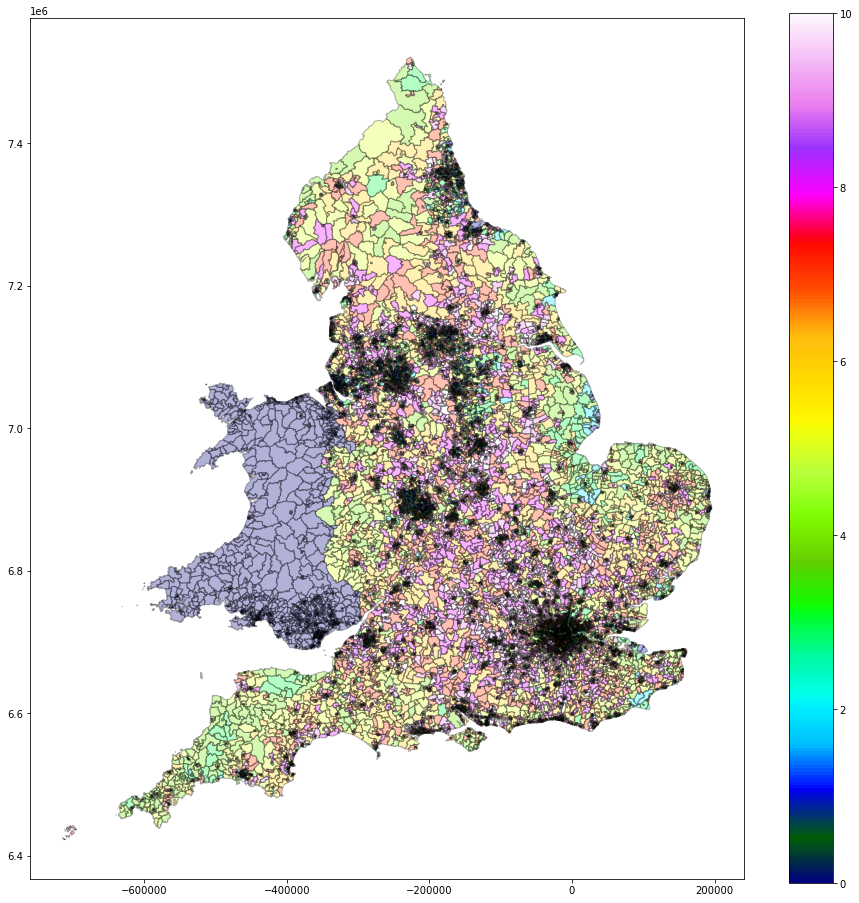

In [13]:
# Create an axis [ax1] that has the information held within the gdf_wm dataframe. Provide styling and colouring option
ax1 = IMD_wm.plot(figsize=(16, 16), alpha=0.3, column="IMDDecil", edgecolor="k", cmap="gist_ncar",legend=True)
# Use the Contextily module to add a basemap underneath axes (ax1), which will look like OpenStreetMap. We make sure Contextily uses the same 'CRS' system by supplying this as an argument
cx.add_basemap(ax1, crs='EPSG:3857')
plt.show()